# Files and Symbols Distribution

- **Created by Andrés Segura Tinoco**  
- **Created on June 17, 2019**

In computer science a **file** is a resource for recording data discretely in a computer storage device. Just as words can be written to paper, so can information be written to a computer file. Files can be edited and transferred through the internet on that particular computer system. Some types of files are: text files, images, videos, music, etc. <a href='#link_one'>[1]</a>

In [1]:
# Load Python libraries
import io
import numpy as np
import pandas as pd
from collections import Counter
from PIL import Image

In [2]:
# Load Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Image 1

In [3]:
# Loading an example image
file_path = "../data/img/example-1.png"
img = Image.open(file_path)

In [4]:
# Show image dimension (resolution)
img.size

(1920, 1080)

In [5]:
# Show image extension
img.format

'PNG'

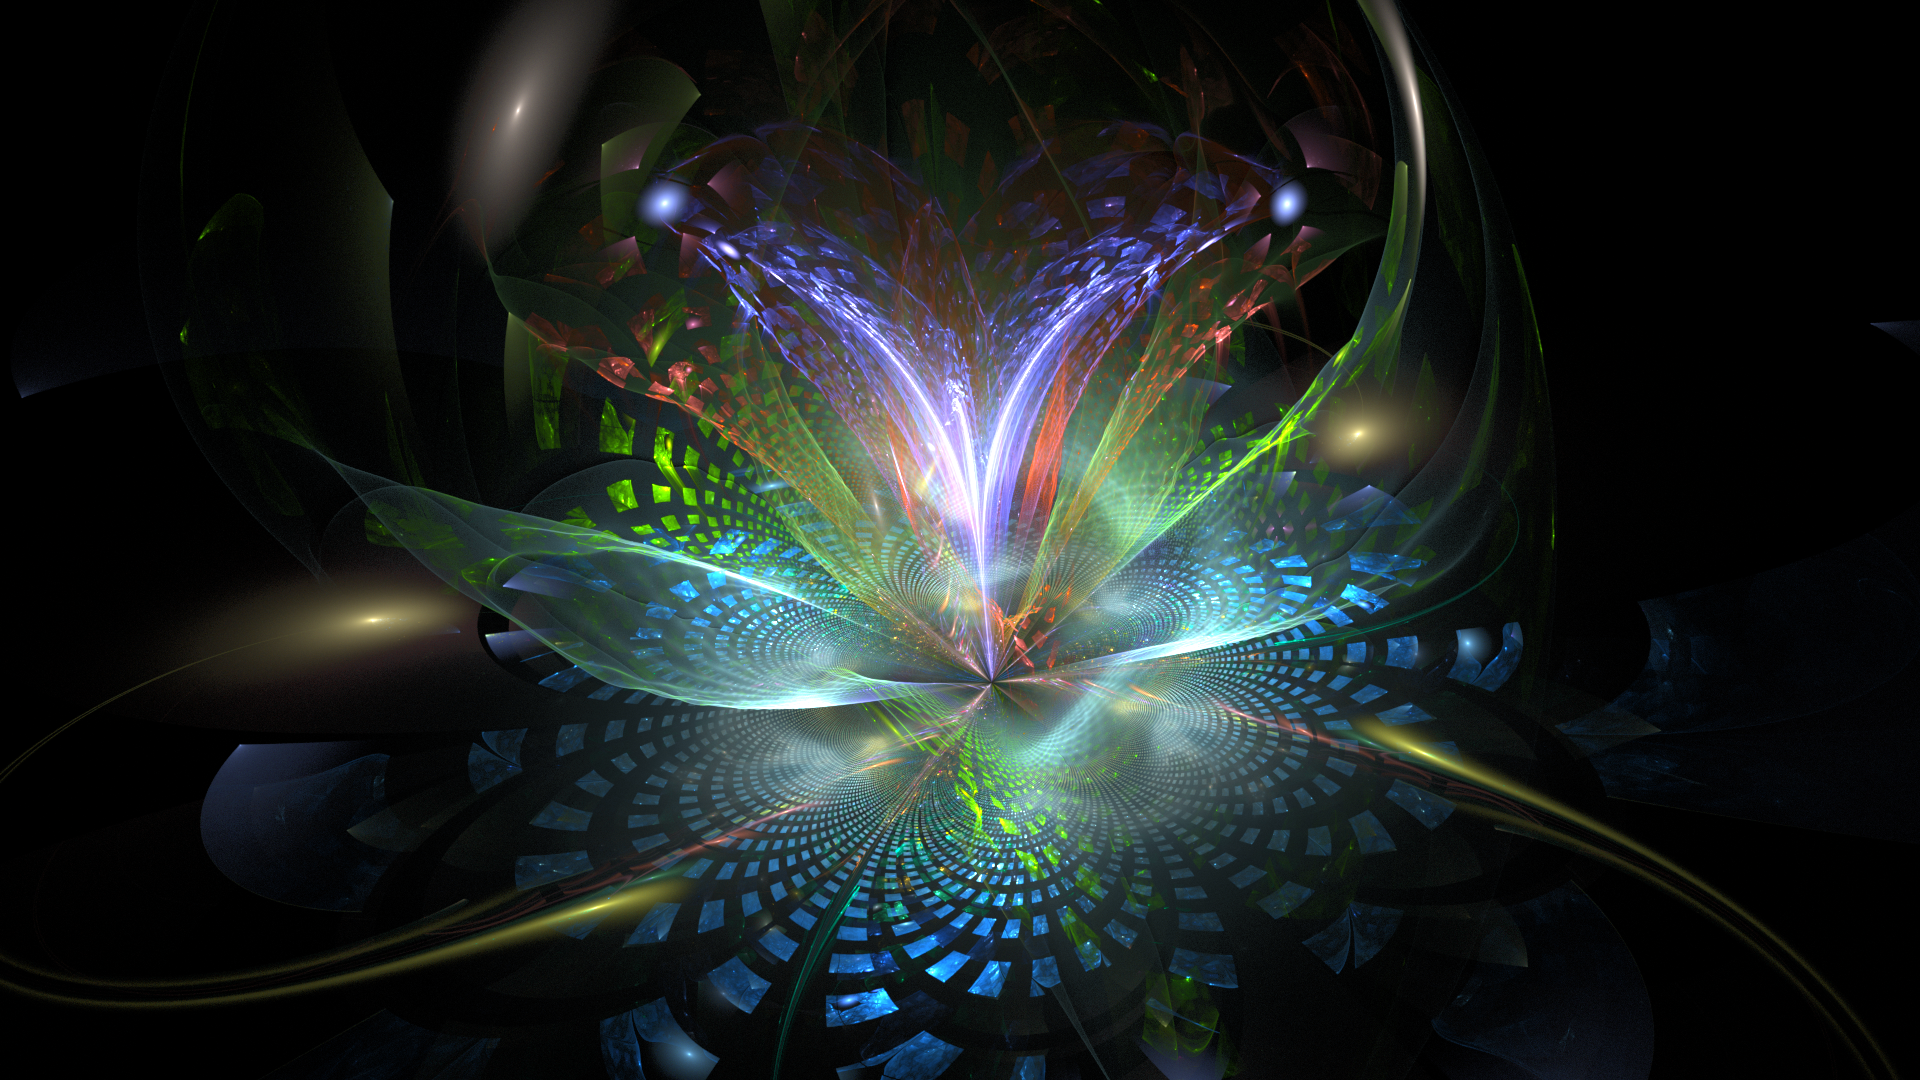

In [6]:
# Show image
img

In [7]:
# Read file in low level (Bytes)
def get_image_bytes(file_path):
    with open(file_path, 'rb') as f:
        return bytearray(f.read());
    return None;

In [8]:
# Show size (KB)
low_byte_list1 = get_image_bytes(file_path)
round(len(low_byte_list1) / 1024, 2)

2728.96

In [9]:
# Show size (MB)
round(len(low_byte_list1) / 1024 / 1020, 2)

2.68

In [10]:
# Create a matrix
row_len = 2232
col_len = 1252
matrix = np.zeros((row_len, col_len))
matrix.shape

(2232, 1252)

In [11]:
# Calculate additional bits
gap = np.prod(matrix.shape) - len(low_byte_list1)
gap

6

In [12]:
# Save bytes into matrix
data = np.array(low_byte_list1)
for i in range(0, len(data)):
    ix_row = int(i / col_len)
    ix_col = i % col_len
    matrix[ix_row][ix_col] = data[i]

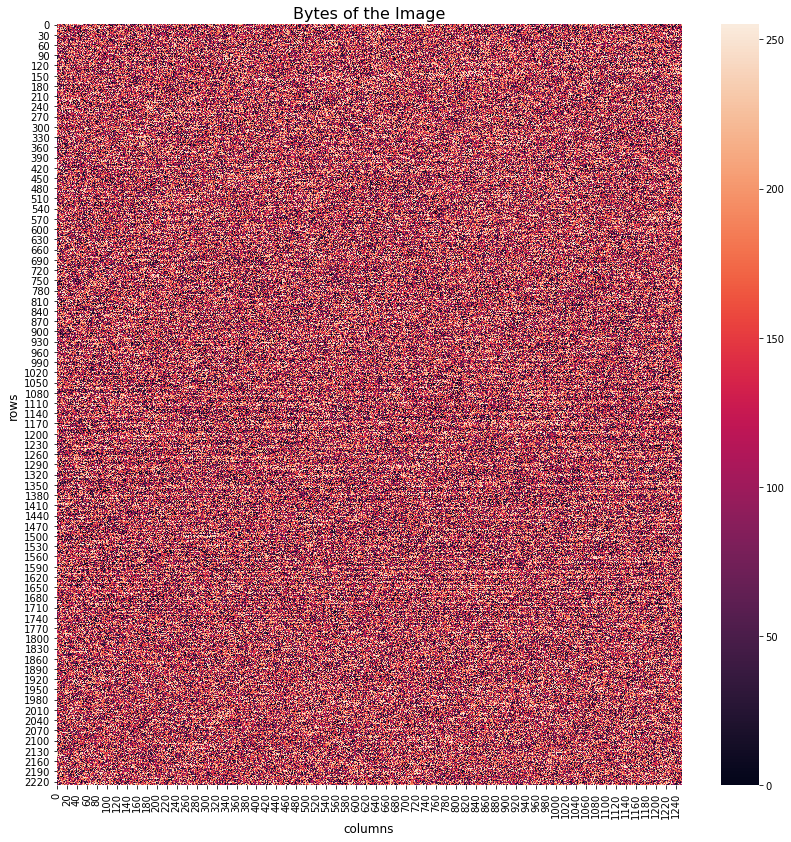

In [13]:
# Plot image in binary
fig, ax = plt.subplots(figsize = (14, 14))
sns.heatmap(matrix, ax = ax)
ax.set_title("Bytes of the Image", fontsize = 16)
ax.set_xlabel('columns', fontsize = 12)
ax.set_ylabel('rows', fontsize = 12)
plt.show()

## Bytes Distribution

In [14]:
# Calculate code frequency
term_freq = Counter(low_byte_list1)
n = len(term_freq)
n

256

In [15]:
# Normalize term frequency
N = sum(term_freq.values())
for term in term_freq:
    term_freq[term] = term_freq[term] / N

In [16]:
# Create a temp dataframe
df = pd.DataFrame.from_records(term_freq.most_common(n), columns = ['Byte', 'Frequency'])
df.head(10)

Byte  Frequency
0    68   0.005283
1    34   0.005271
2   221   0.005159
3   102   0.005149
4    17   0.005098
5   238   0.005066
6     0   0.005039
7   204   0.005013
8   136   0.004966
9   247   0.004949

In [17]:
# Create pretty x axis labels
def get_x_labels():
    x_labels = []
    for ix in range(256):
        if ix % 5 == 0:
            x_labels.append(str(ix))
        else:
            x_labels.append('')
    return x_labels

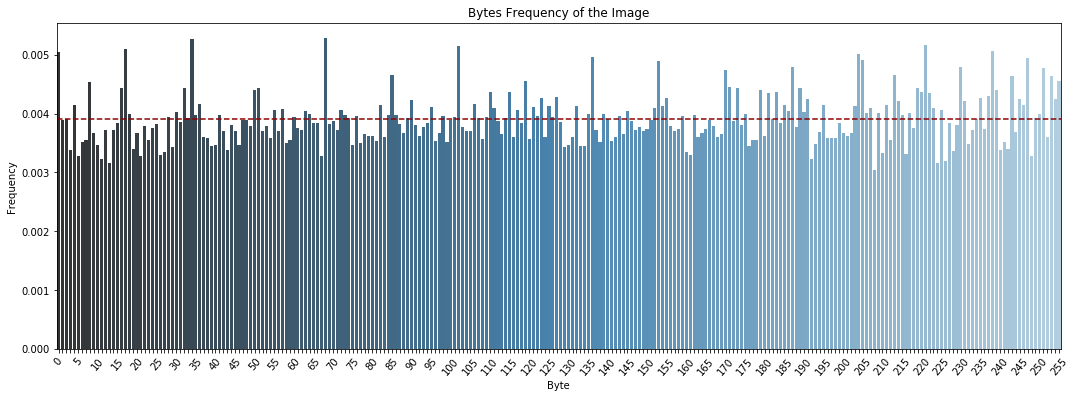

In [18]:
# Probability of each symbol by default
p_x = 1/256

# Plot the frequency of the bytes in the file
fig = plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'Byte', y = 'Frequency', data = df.sort_values(by=['Byte']), palette=("Blues_d"))
ax.set_xticklabels(labels = get_x_labels(), fontsize = 10, rotation = 50)
plt.axhline(y = p_x, color = "#8b0000", linestyle = "--")
plt.title('Bytes Frequency of the Image')
plt.show()

## Entropy

In [19]:
# Load entropy libraries
from scipy.stats import entropy

\begin{align}
    Entropy(X) = H(X) = -\sum_{i=1}^n (P_i \log_{2} P_i) \tag{1}
\end{align}

In [20]:
# Return shannon entropy
def entropy_shannon(labels, base=None):
    value, counts = np.unique(labels, return_counts=True)
    return entropy(counts, base=base)

In [21]:
# Calculate entropy of image
entropy_shannon(low_byte_list1, 2)

7.99165525124776

In [22]:
# Number of bytes
len(low_byte_list1)

2794458

The minimum number of bytes needed to encode this image is:

$$ Min_{Bytes} = 2,794,458.00 * 7.99165525124776\; /\; 8 = 2,791,543.12 $$
$$ Gain = ((2,794,458.00 - 2,791,543.12)\; /\; 2,794,458.00) =  0.10 \% $$

**Analysis**

Because almost all the bytes of the image are equiprobable $ (P_{i} \simeq \frac{1}{256}) $, then to encode a message with that alphabet (of 256 symbols) a minimum of 7.99 bits per symbol is needed.

\begin{align}
    \log_{2}(256) = 8 \simeq 7.9916 \tag{2}
\end{align}

## Image 2

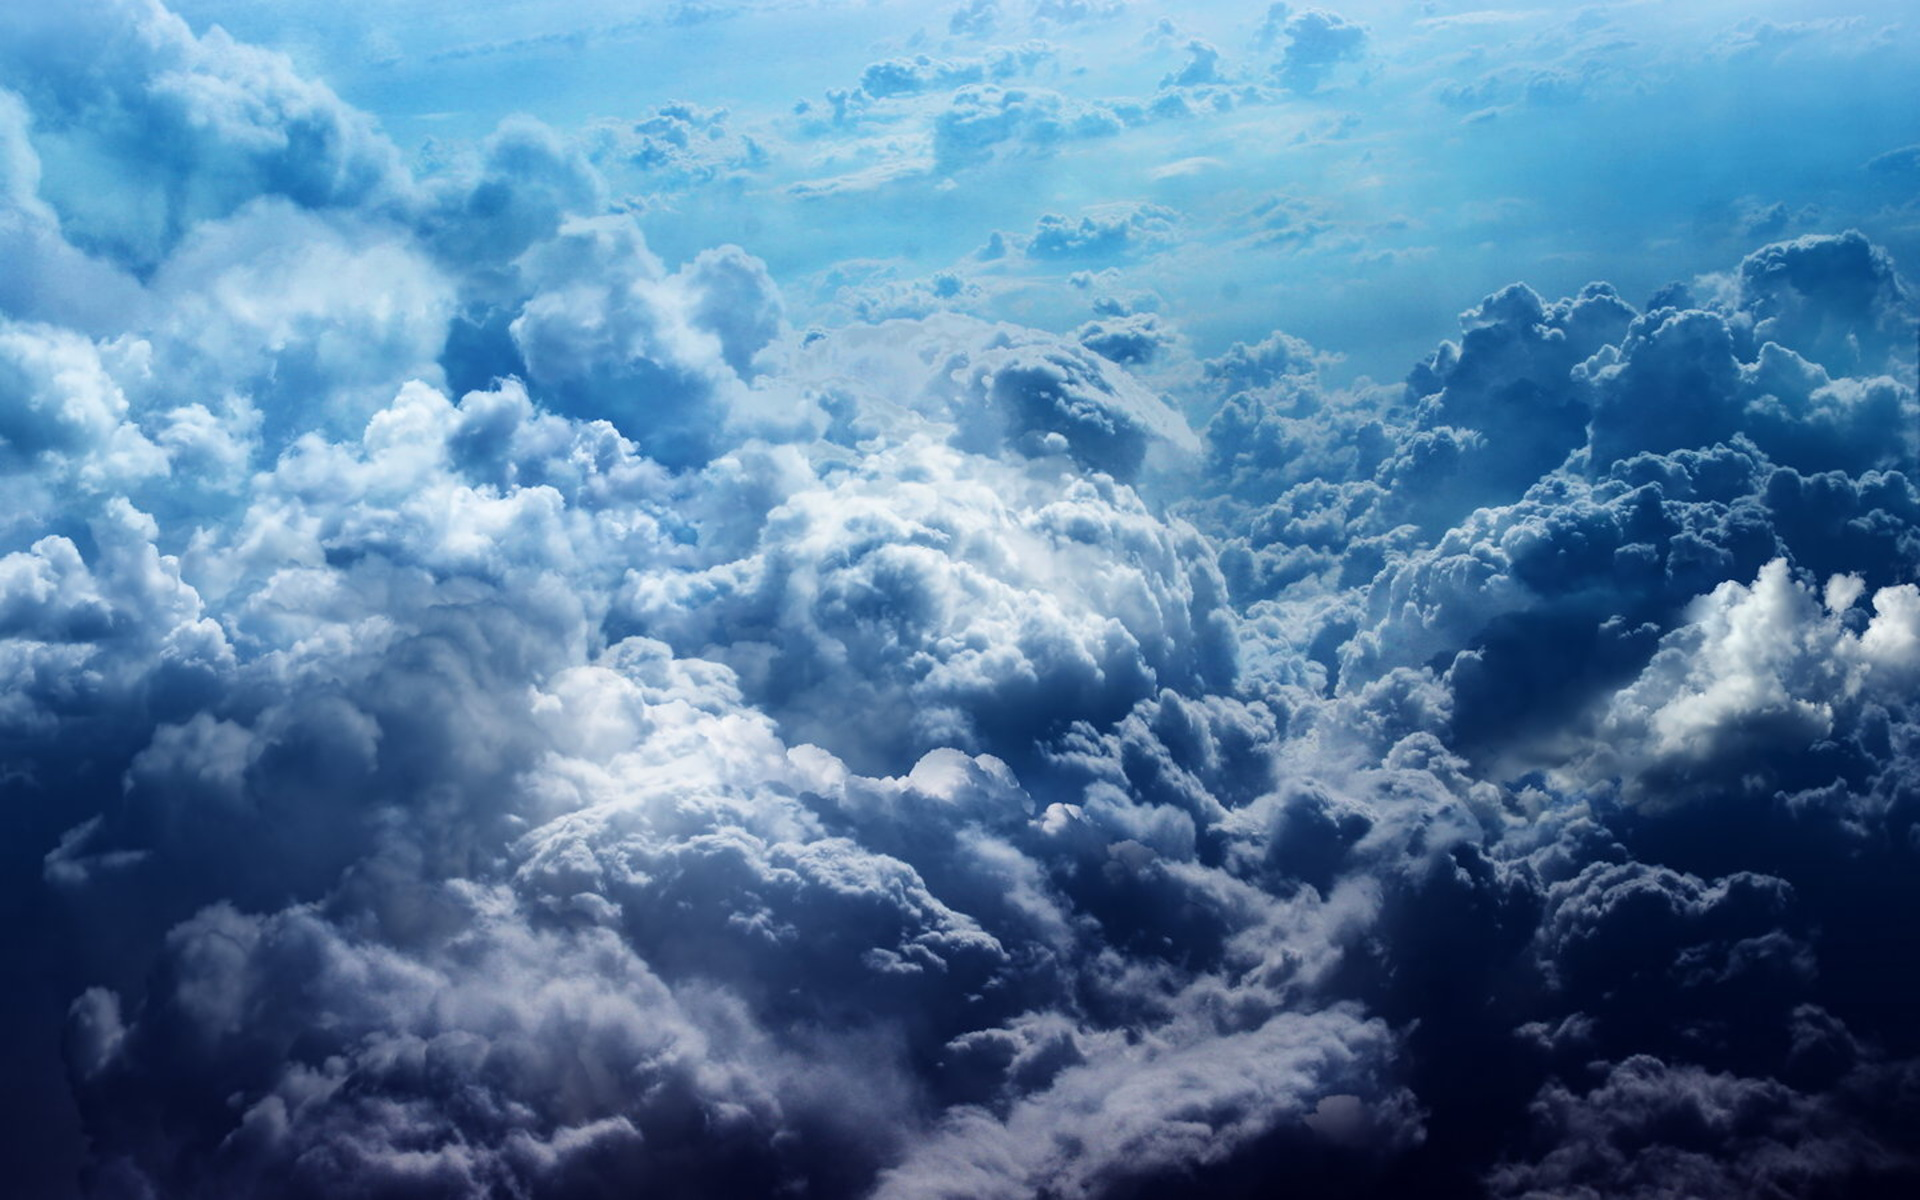

In [23]:
# Loading an example image
file_path = "../data/img/example-2.png"
Image.open(file_path)

In [24]:
# Read file in low level (Bytes)
low_byte_list2 = get_image_bytes(file_path)

In [25]:
# Calculate entropy of image
entropy_shannon(low_byte_list2, 2)

7.972001393883315

In [26]:
# Number of bytes
len(low_byte_list2)

2953223

The minimum number of bytes needed to encode this image is:
    
$$ Min_{Bytes} = 2,953,223 * 7.972001393883315\;/\;8 = 2,942,887.23 $$

$$ Gain = ((2,953,223.00 - 2,942,887.23)\; /\; 2,953,223.00) =  0.35 \% $$

# References

<a name='#link_one' href='https://en.wikipedia.org/wiki/Computer_file' target='_blank' >[1]</a> Wikipedia - Computer file.  

<hr>
<p><a href="https://ansegura7.github.io/DataCompression/">« Home</a></p>